In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error, accuracy_score #model evaluation
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
%matplotlib inline


##Question 1: When predicting player net worth, which pair of variables improved the model’s performance the most (Level, skills, or gamemode)? Which variable was the least useful?

NOTE: Edited from "which variable" to "which pair of variables"

In [ ]:
final_data = pd.read_csv("/content/final_players_mode.csv")
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player Name   375 non-null    object 
 1   Level         375 non-null    int64  
 2   Net Worth     375 non-null    float64
 3   Taming        374 non-null    float64
 4   Farming       375 non-null    int64  
 5   Mining        375 non-null    int64  
 6   Combat        375 non-null    int64  
 7   Foraging      375 non-null    int64  
 8   Fishing       375 non-null    int64  
 9   Enchanting    375 non-null    int64  
 10  Alchemy       375 non-null    int64  
 11  Carpentry     375 non-null    int64  
 12  Runecrafting  337 non-null    float64
 13  Social        337 non-null    float64
 14  Gamemode      375 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 44.1+ KB


In [ ]:
# LINEAR REGRESSION #1 - Level, Skills, Gamemode
final_data = pd.read_csv("/content/final_players_mode.csv")
final_data.dropna(inplace = True)
final_data.reset_index(inplace = True)
# print(clothing.info())
predictors = ["Level", "Taming", "Farming", "Mining", "Combat", "Foraging", "Fishing",
              "Enchanting", "Alchemy", "Carpentry", "Runecrafting", "Social", "Gamemode"]

contin = ["Level", "Taming", "Farming", "Mining", "Combat", "Foraging", "Fishing",
              "Enchanting", "Alchemy", "Carpentry", "Runecrafting", "Social"]

X = final_data[predictors]
y = final_data["Net Worth"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = make_column_transformer((StandardScaler(), contin),
                            (OneHotEncoder(), ["Gamemode"]),
                            remainder = "passthrough")


lr = LinearRegression()



pipe = Pipeline([
    ("zscore", z),
    ("linearregression", lr)
])

pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess - probably don't need MSE, MAE, etc.
mse_model1_quint = (mean_squared_error(y_test,y_pred_test) / 1e18)
mae_model1_bil = (mean_absolute_error(y_test,y_pred_test) / 1e9)
mape_model1 = mean_absolute_percentage_error(y_test,y_pred_test)
r2_model1 = r2_score(y_test,y_pred_test)
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_absolute_percentage_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_absolute_percentage_error(y_test,y_pred_test))
print("Test R2  : ", r2_score(y_test,y_pred_test))


Train MSE :  4.6706670990962373e+20
Train MAE :  10452055049.57265
Train MAPE:  13.050883213884712
Train R2  :  0.55214066127078
Test MSE  :  4.86145774918018e+20
Test MAE  :  12382341830.627247
Test MAPE :  24.75205902100768
Test R2  :  0.567975324528242


In [ ]:
# LINEAR REGRESSION #2 - Level, Skills
final_data = pd.read_csv("/content/final_players_mode.csv")
final_data.dropna(inplace = True)
final_data.reset_index(inplace = True)
# print(clothing.info())
predictors = ["Level", "Taming", "Farming", "Mining", "Combat", "Foraging", "Fishing",
              "Enchanting", "Alchemy", "Carpentry", "Runecrafting", "Social"]


X = final_data[predictors]
y = final_data["Net Worth"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")


lr = LinearRegression()



pipe = Pipeline([
    ("zscore", z),
    ("linearregression", lr)
])

pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess - probably don't need MSE, MAE, etc.
mse_model2_quint = (mean_squared_error(y_test,y_pred_test) / 1e18)
mae_model2_bil = (mean_absolute_error(y_test,y_pred_test) / 1e9)
mape_model2 = mean_absolute_percentage_error(y_test,y_pred_test)
r2_model2 = r2_score(y_test,y_pred_test)
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_absolute_percentage_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_absolute_percentage_error(y_test,y_pred_test))
print("Test R2  : ", r2_score(y_test,y_pred_test))

Train MSE :  2.1552466449251136e+20
Train MAE :  8384996438.045492
Train MAPE:  9.962611331210207
Train R2  :  0.6596708505251252
Test MSE  :  1.5681948566483228e+21
Test MAE  :  16181598824.623764
Test MAPE :  12.301473807602287
Test R2  :  0.40778806792381683


In [ ]:
# LINEAR REGRESSION #3 - Skills, Gamemode
final_data = pd.read_csv("/content/final_players_mode.csv")
final_data.dropna(inplace = True)
final_data.reset_index(inplace = True)
# print(clothing.info())
predictors = ["Taming", "Farming", "Mining", "Combat", "Foraging", "Fishing",
              "Enchanting", "Alchemy", "Carpentry", "Runecrafting", "Social", "Gamemode"]

contin = ["Taming", "Farming", "Mining", "Combat", "Foraging", "Fishing",
              "Enchanting", "Alchemy", "Carpentry", "Runecrafting", "Social"]

X = final_data[predictors]
y = final_data["Net Worth"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = make_column_transformer((StandardScaler(), contin),
                            (OneHotEncoder(), ["Gamemode"]),
                            remainder = "passthrough")


lr = LinearRegression()



pipe = Pipeline([
    ("zscore", z),
    ("linearregression", lr)
])

pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess - probably don't need MSE, MAE, etc.
mse_model3_quint = (mean_squared_error(y_test,y_pred_test) / 1e18)
mae_model3_bil = (mean_absolute_error(y_test,y_pred_test) / 1e9)
mape_model3 = mean_absolute_percentage_error(y_test,y_pred_test)
r2_model3 = r2_score(y_test,y_pred_test)
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_absolute_percentage_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_absolute_percentage_error(y_test,y_pred_test))
print("Test R2  : ", r2_score(y_test,y_pred_test))

Train MSE :  3.4786907664678676e+20
Train MAE :  11310901354.246088
Train MAPE:  49.56254531581708
Train R2  :  0.5714505045009335
Test MSE  :  1.2690333747841524e+21
Test MAE  :  14953012120.661797
Test MAPE :  86.82503132639526
Test R2  :  0.37650951583226633


In [ ]:
# LINEAR REGRESSION #4 - Level, Gamemode
final_data = pd.read_csv("/content/final_players_mode.csv")
final_data.dropna(inplace = True)
final_data.reset_index(inplace = True)
# print(clothing.info())
predictors = ["Level", "Gamemode"]

contin = ["Level"]

X = final_data[predictors]
y = final_data["Net Worth"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = make_column_transformer((StandardScaler(), contin),
                            (OneHotEncoder(), ["Gamemode"]),
                            remainder = "passthrough")


lr = LinearRegression()



pipe = Pipeline([
    ("zscore", z),
    ("linearregression", lr)
])

pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess - probably don't need MSE, MAE, etc.
mse_model4_quint = (mean_squared_error(y_test,y_pred_test) / 1e18)
mae_model4_bil = (mean_absolute_error(y_test,y_pred_test) / 1e9)
mape_model4 = mean_absolute_percentage_error(y_test,y_pred_test)
r2_model4 = r2_score(y_test,y_pred_test)
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_absolute_percentage_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_absolute_percentage_error(y_test,y_pred_test))
print("Test R2  : ", r2_score(y_test,y_pred_test))

Train MSE :  5.960905759098972e+20
Train MAE :  12724882255.407452
Train MAPE:  90.54937874508757
Train R2  :  0.4474852443622622
Test MSE  :  5.1718300082761014e+20
Test MAE  :  13748177022.851368
Test MAPE :  45.997922075636765
Test R2  :  0.47458208752231035


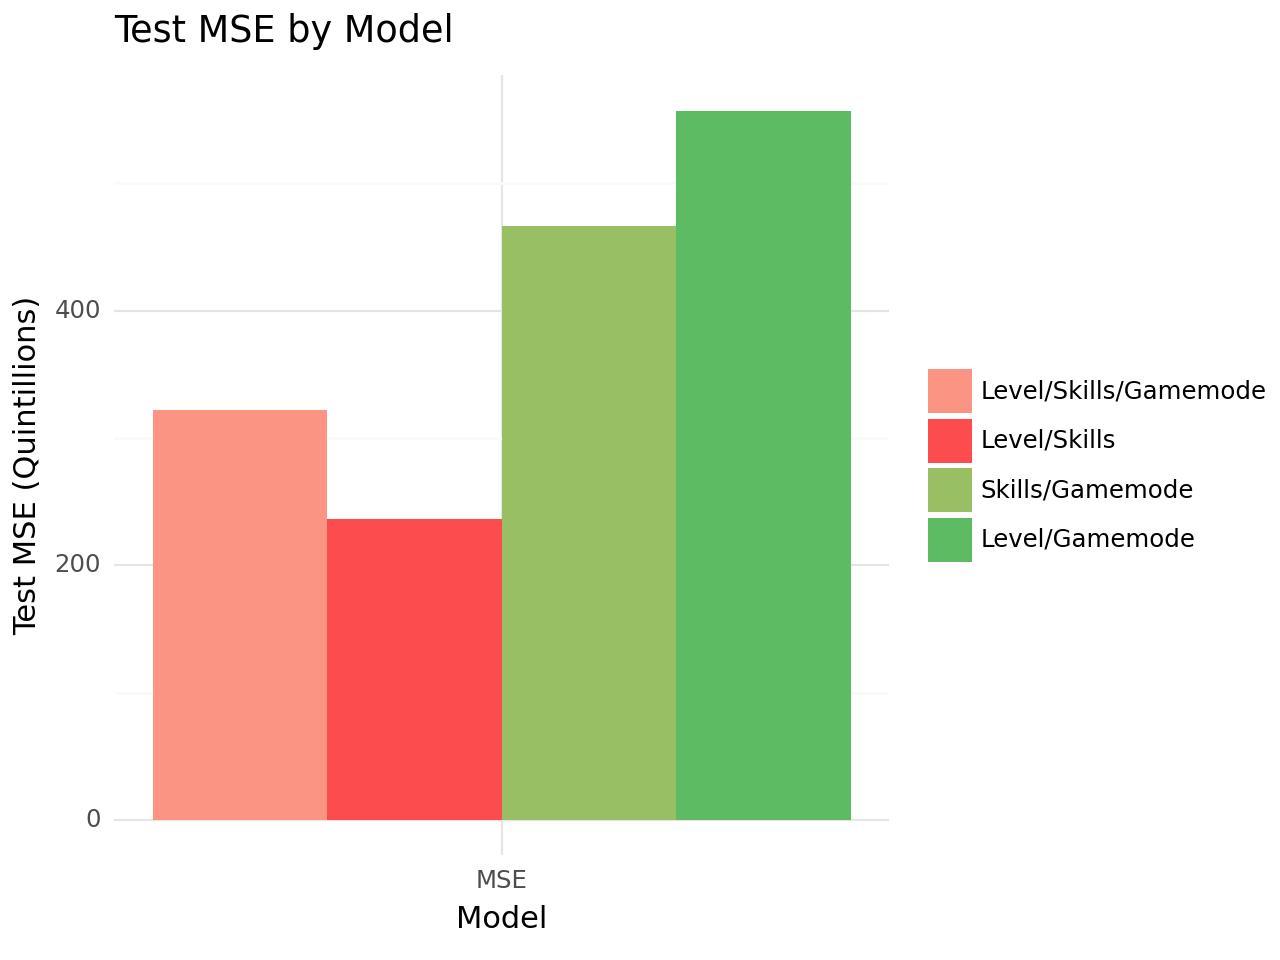

<Figure Size: (640 x 480)>

In [ ]:
metrics_df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
    'Metric': ['MSE'] * 4,
    'Value': [mse_model1_quint, mse_model2_quint, mse_model3_quint, mse_model4_quint]
})

# Plot the bar graphs using plotnine
(ggplot(metrics_df, aes(x='Metric', y='Value', fill='Model')) +
 geom_bar(stat='identity', position='dodge') +
 theme_minimal() +
 labs(title='Test MSE by Model') +
 xlab('Model') +
 ylab('Test MSE (Quintillions)') +
 scale_fill_manual(values=["#FC9483", "#FC4C4E", "#98BF64", "#5DBB63"],  # Colors
                   labels=["Level/Skills/Gamemode", "Level/Skills", "Skills/Gamemode", "Level/Gamemode"]) +  # Custom labels
 theme(legend_title=element_blank()))

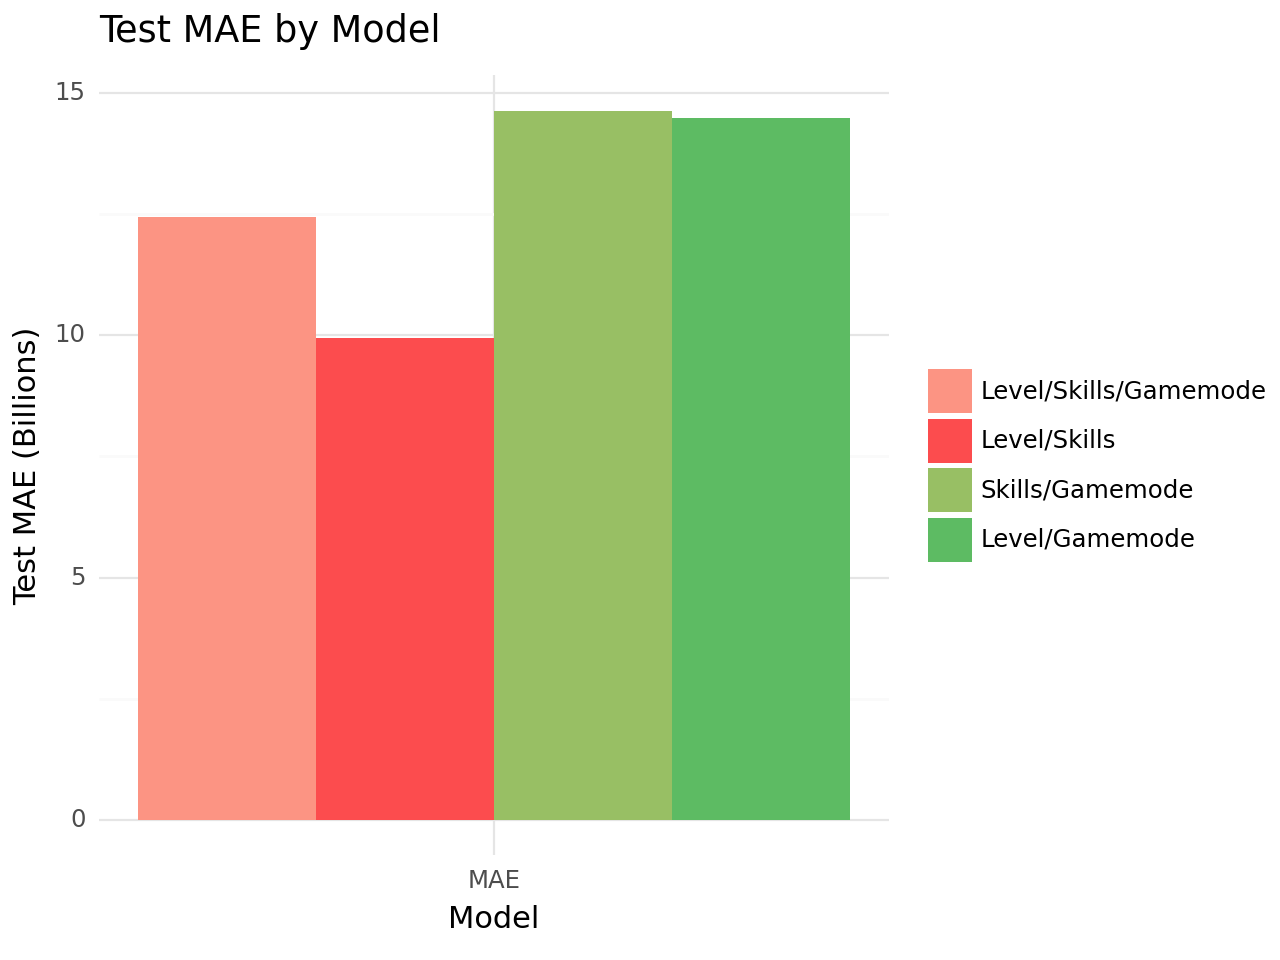

<Figure Size: (640 x 480)>

In [ ]:
metrics_df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
    'Metric': ['MAE'] * 4,
    'Value': [mae_model1_bil, mae_model2_bil, mae_model3_bil, mae_model4_bil]
})

# Plot the bar graphs using plotnine
(ggplot(metrics_df, aes(x='Metric', y='Value', fill='Model')) +
 geom_bar(stat='identity', position='dodge') +
 theme_minimal() +
 labs(title='Test MAE by Model') +
 xlab('Model') +
 ylab('Test MAE (Billions)') +
 scale_fill_manual(values=["#FC9483", "#FC4C4E", "#98BF64", "#5DBB63"],  # Colors
                   labels=["Level/Skills/Gamemode", "Level/Skills", "Skills/Gamemode", "Level/Gamemode"]) +  # Custom labels
 theme(legend_title=element_blank()))

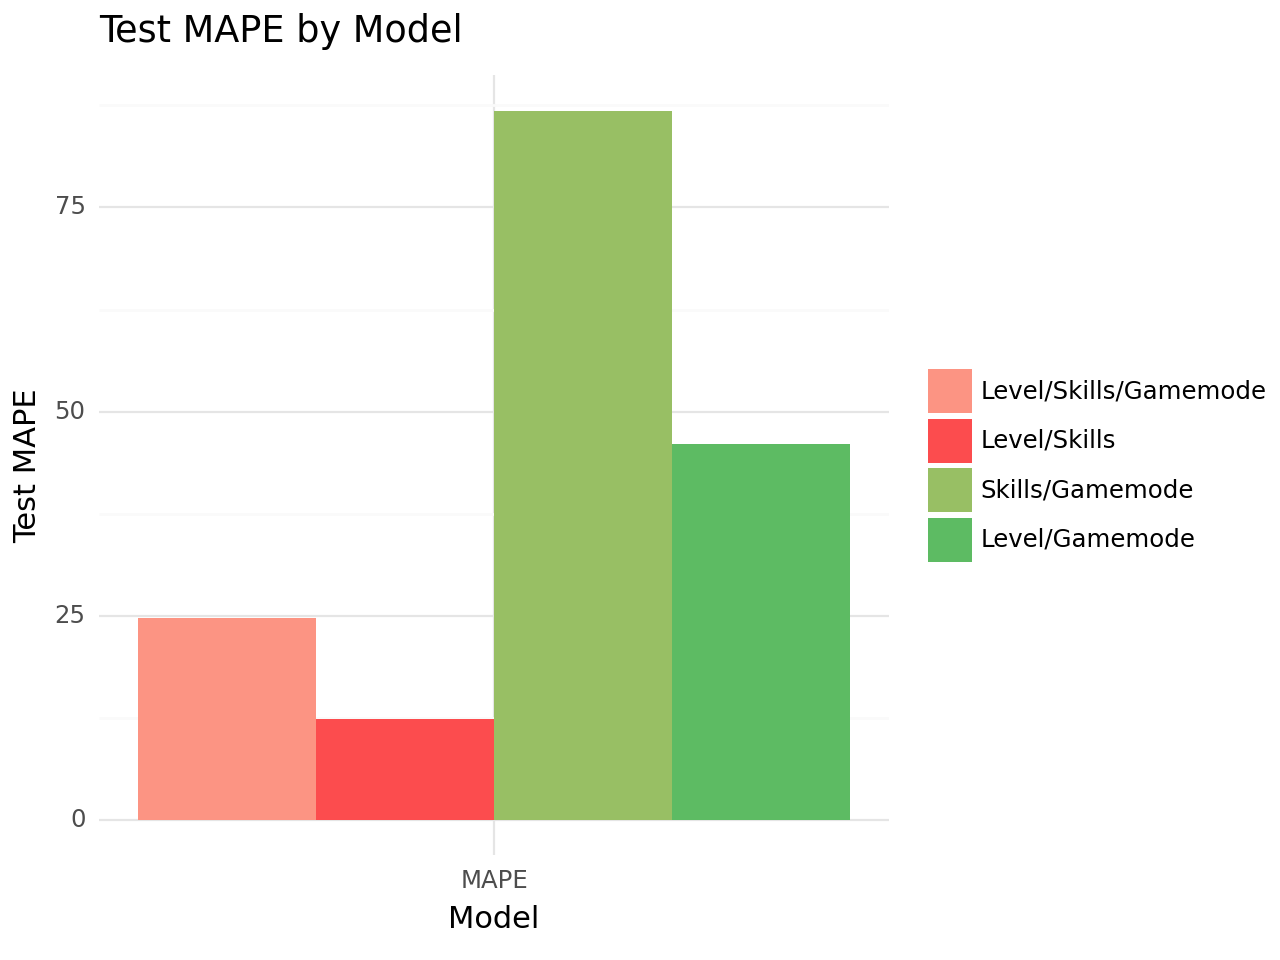

<Figure Size: (640 x 480)>

In [ ]:
metrics_df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
    'Metric': ['MAPE'] * 4,
    'Value': [mape_model1, mape_model2, mape_model3, mape_model4]
})

# Plot the bar graphs using plotnine
(ggplot(metrics_df, aes(x='Metric', y='Value', fill='Model')) +
 geom_bar(stat='identity', position='dodge') +
 theme_minimal() +
 labs(title='Test MAPE by Model') +
 xlab('Model') +
 ylab('Test MAPE') +
 scale_fill_manual(values=["#FC9483", "#FC4C4E", "#98BF64", "#5DBB63"],  # Colors
                   labels=["Level/Skills/Gamemode", "Level/Skills", "Skills/Gamemode", "Level/Gamemode"]) +  # Custom labels
 theme(legend_title=element_blank()))

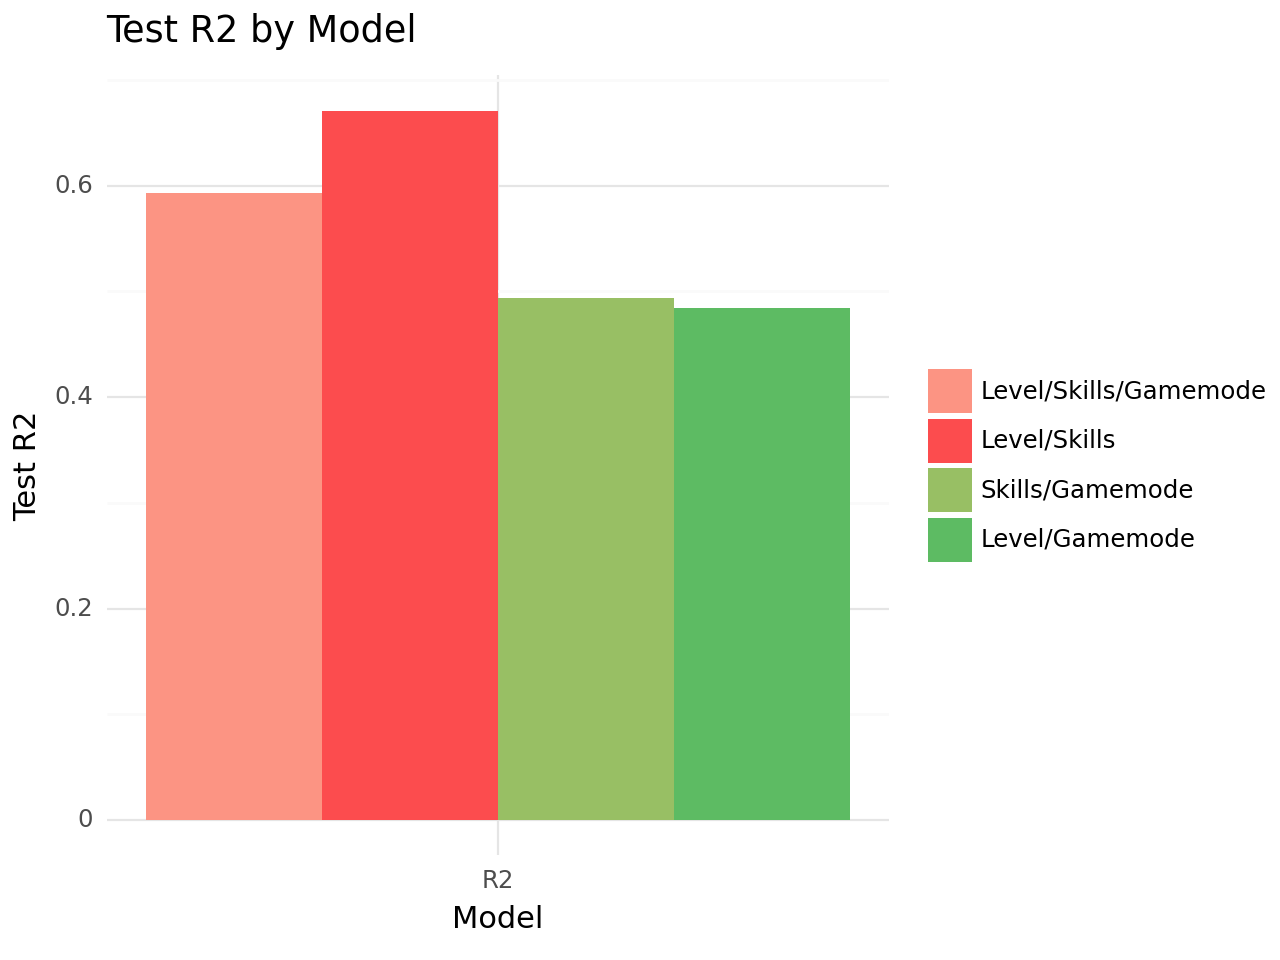

<Figure Size: (640 x 480)>

In [ ]:
metrics_df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
    'Metric': ['R2'] * 4,
    'Value': [r2_model1, r2_model2, r2_model3, r2_model4]
})

# Plot the bar graphs using plotnine
(ggplot(metrics_df, aes(x='Metric', y='Value', fill='Model')) +
 geom_bar(stat='identity', position='dodge') +
 theme_minimal() +
 labs(title='Test R2 by Model') +
 xlab('Model') +
 ylab('Test R2') +
 scale_fill_manual(values=["#FC9483", "#FC4C4E", "#98BF64", "#5DBB63"],  # Colors
                   labels=["Level/Skills/Gamemode", "Level/Skills", "Skills/Gamemode", "Level/Gamemode"]) +  # Custom labels
 theme(legend_title=element_blank()))

##Answer: It seems that Level and Skills might be the best combination of variable [categories], consistently performing not only the best of every combination but better than the combination of all 3. Therefore, gamemode can be seen as the least useful variable, even harmful in some cases.  

##Question 2: When considering player level and skills, does a distinct cluster pattern emerge? If so, when distinguished by gamemode, do cluster patterns change at all?

Note: realized that net worth was screwing up all the models, so I removed it due to it being influenced by other factors. I did, however, keep cosmetic skills in

Model notes: DBSCAN couldn't find any clusters, KMeans was able to perform fairly well but GMM performed slightly better.

0.44872072917655764


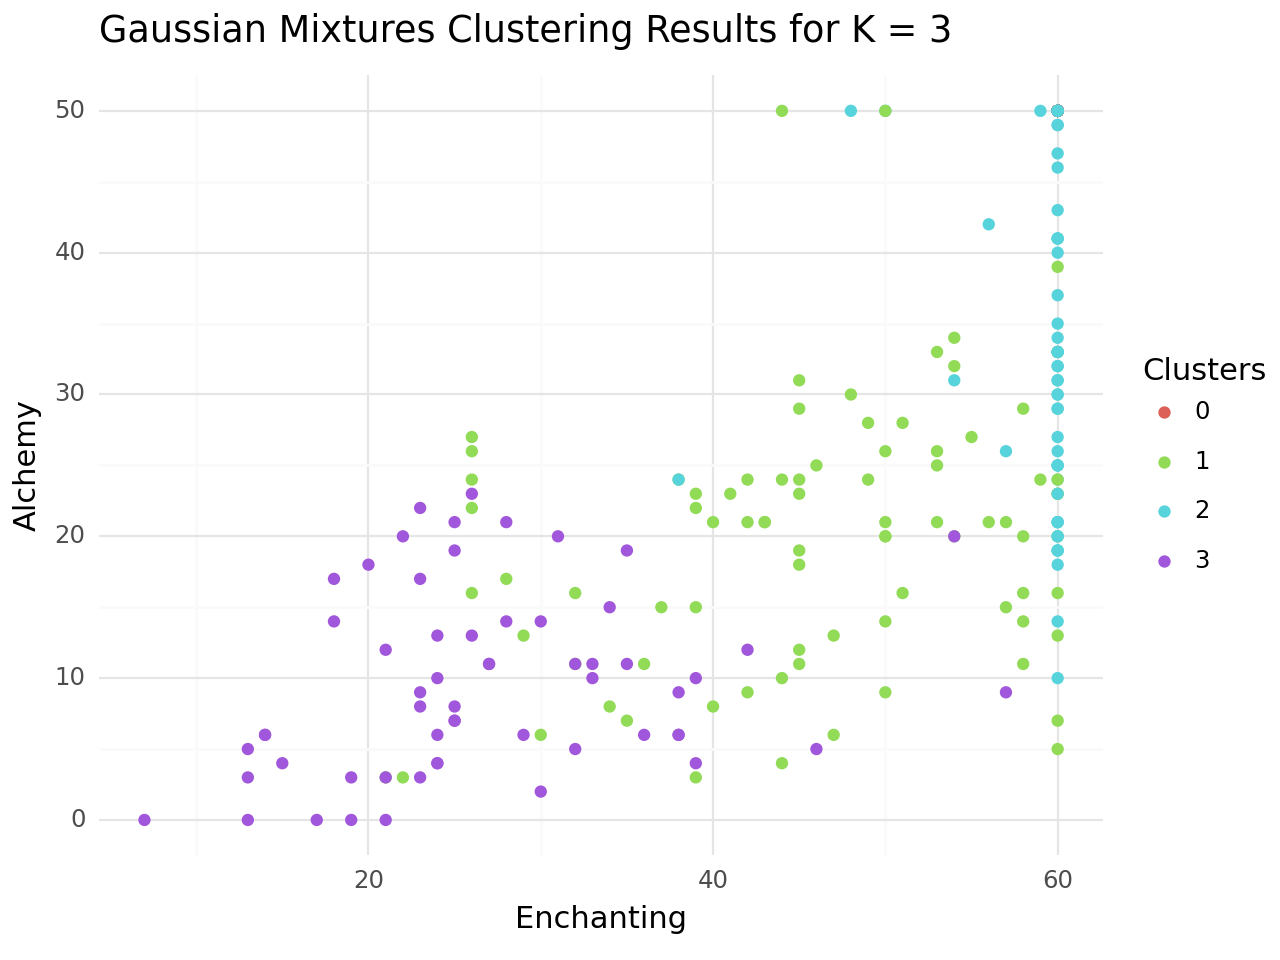

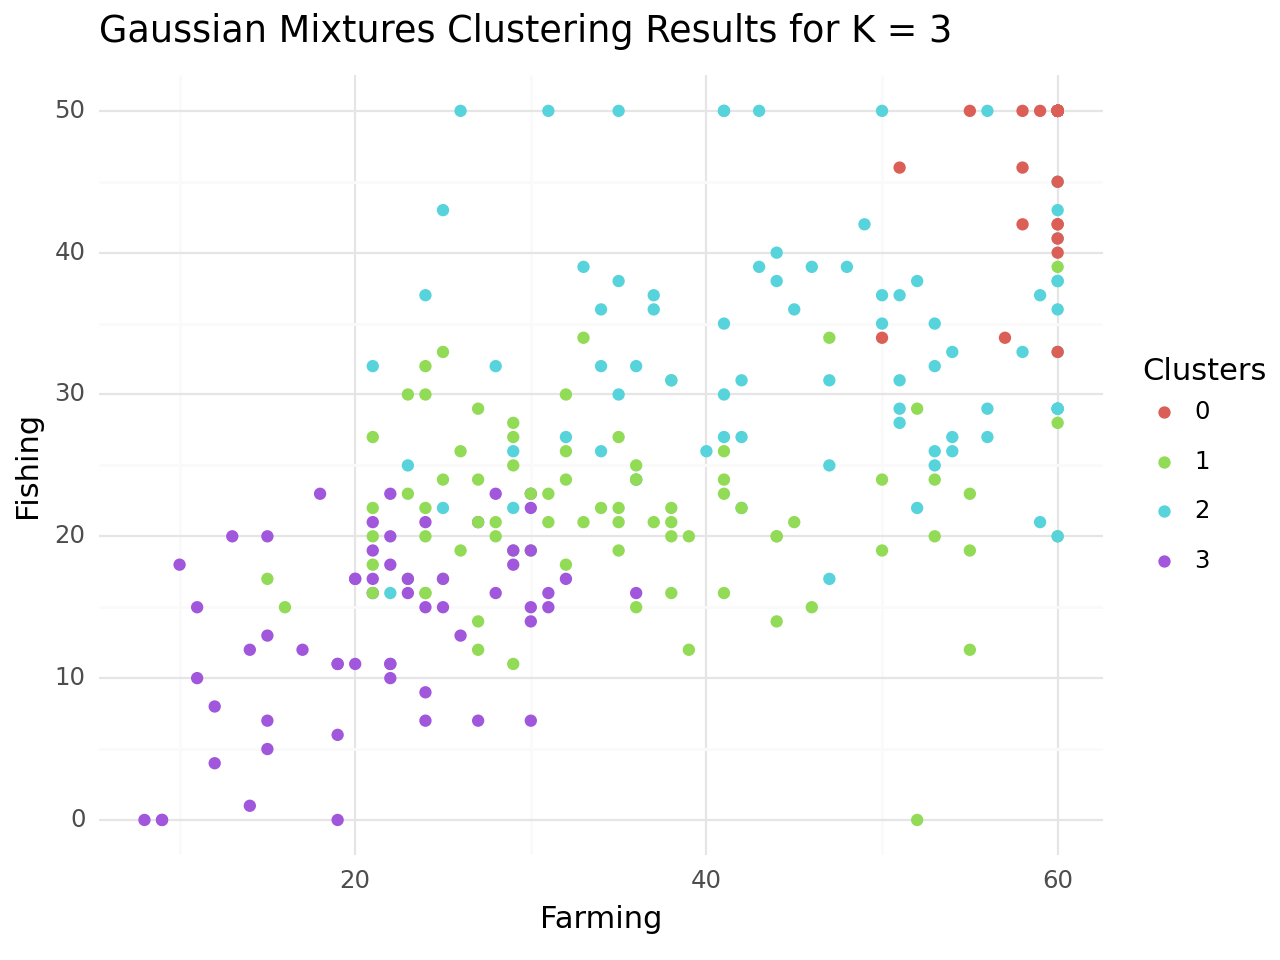

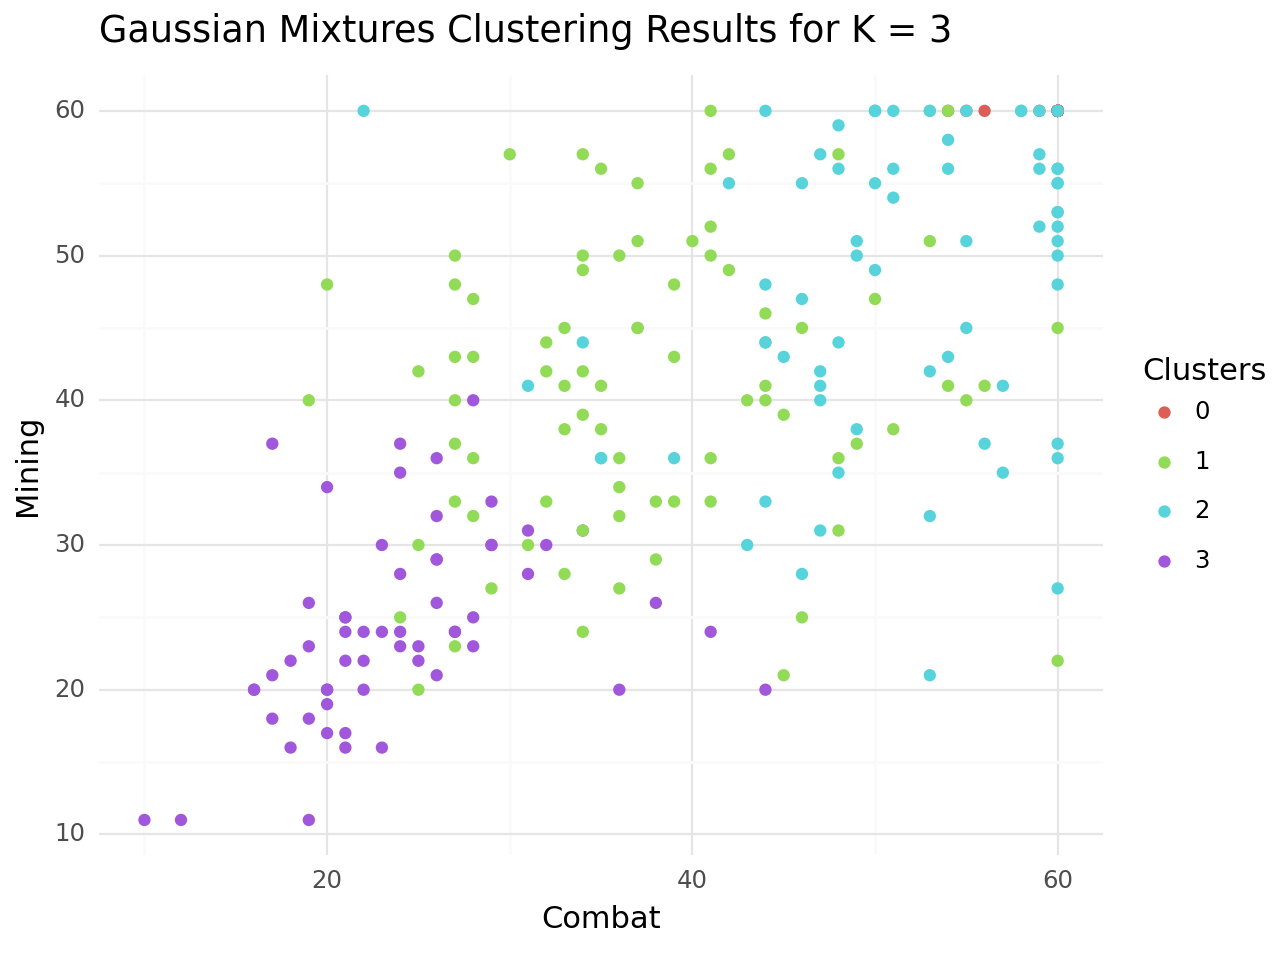

In [ ]:
predictors = ["Level", "Taming", "Farming", "Mining", "Combat", "Foraging", "Fishing",
              "Enchanting", "Alchemy", "Carpentry", "Runecrafting", "Social"]

# Select predictors for X
X = final_data[predictors]

# Define column transformer
z = make_column_transformer(
    (StandardScaler(), predictors),
    remainder="passthrough")

# Define Gaussian Mixture Model pipeline
gmm = GaussianMixture(n_components=4)
gauss_pipe = Pipeline([("z", z), ("clust", gmm)])

# Fit and predict labels
labels = gauss_pipe.fit_predict(X)

# Calculate silhouette score
print(silhouette_score(X, gauss_pipe.predict(X)))

# Add cluster labels to X
X["clusters"] = labels

print(ggplot(X, aes(x = "Enchanting", y = "Alchemy", color = "factor(clusters)" )) +
      geom_point() + theme_minimal() +
     labs(x = "Enchanting", y = "Alchemy", title = "Gaussian Mixtures Clustering Results for K = 4",
         color = "Clusters"))
print(ggplot(X, aes(x = "Farming", y = "Fishing", color = "factor(clusters)" )) +
      geom_point() + theme_minimal() +
     labs(x = "Farming", y = "Fishing", title = "Gaussian Mixtures Clustering Results for K = 4",
         color = "Clusters"))
print(ggplot(X, aes(x = "Combat", y = "Mining", color = "factor(clusters)" )) +
      geom_point() + theme_minimal() +
     labs(x = "Combat", y = "Mining", title = "Gaussian Mixtures Clustering Results for K = 4",
         color = "Clusters"))

0.428600372579245


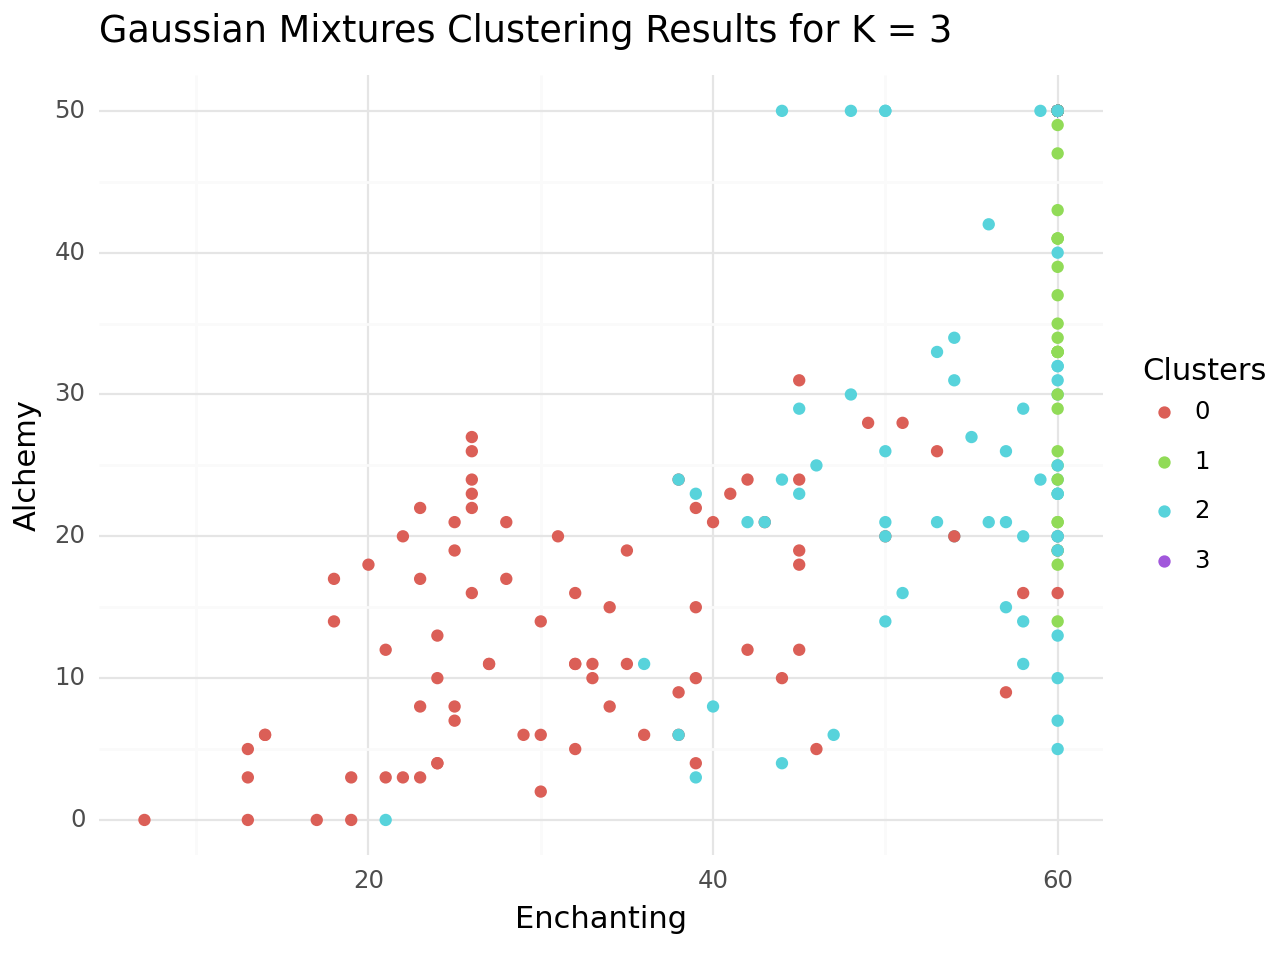

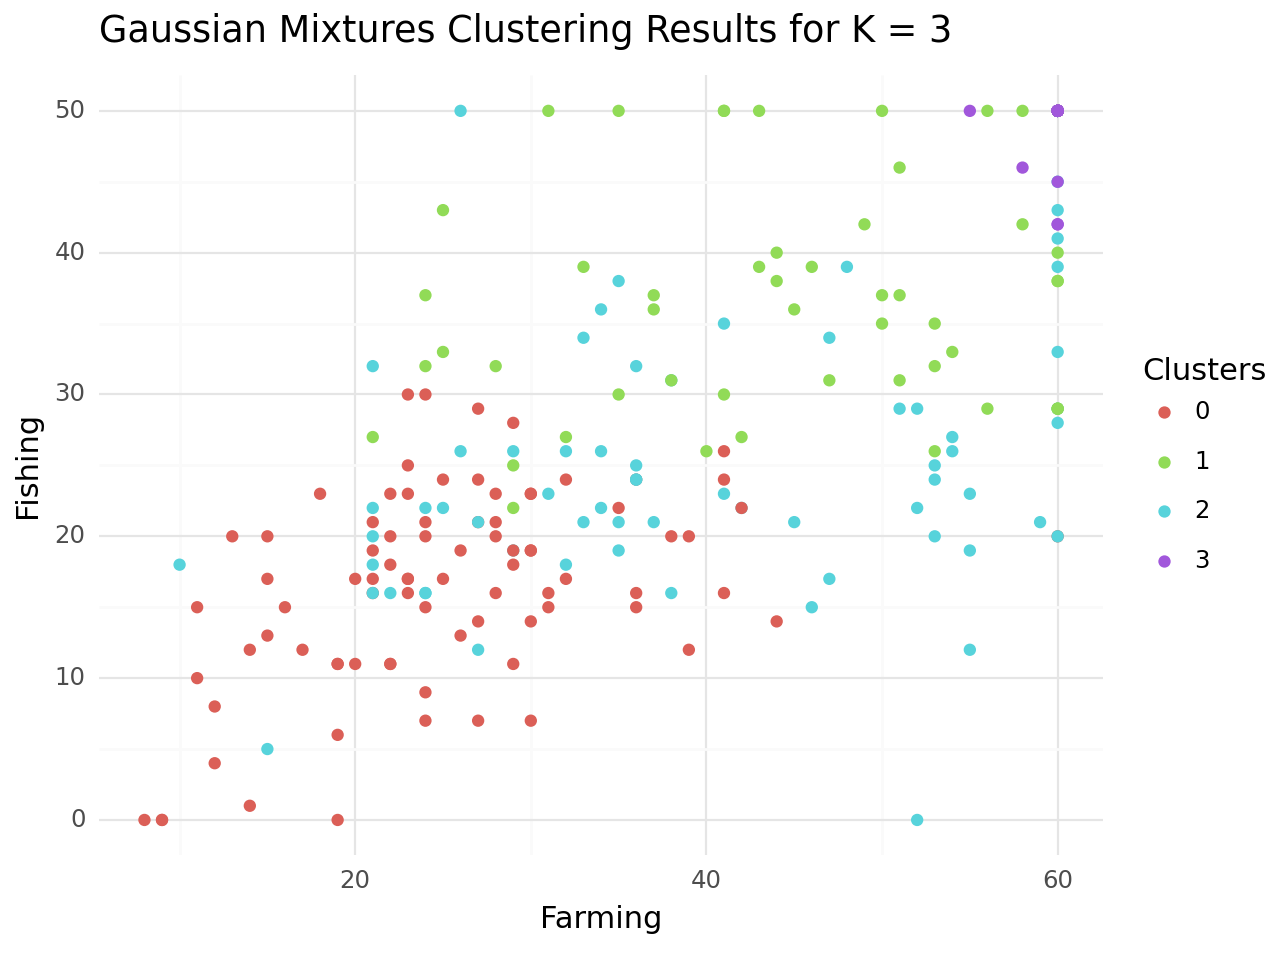

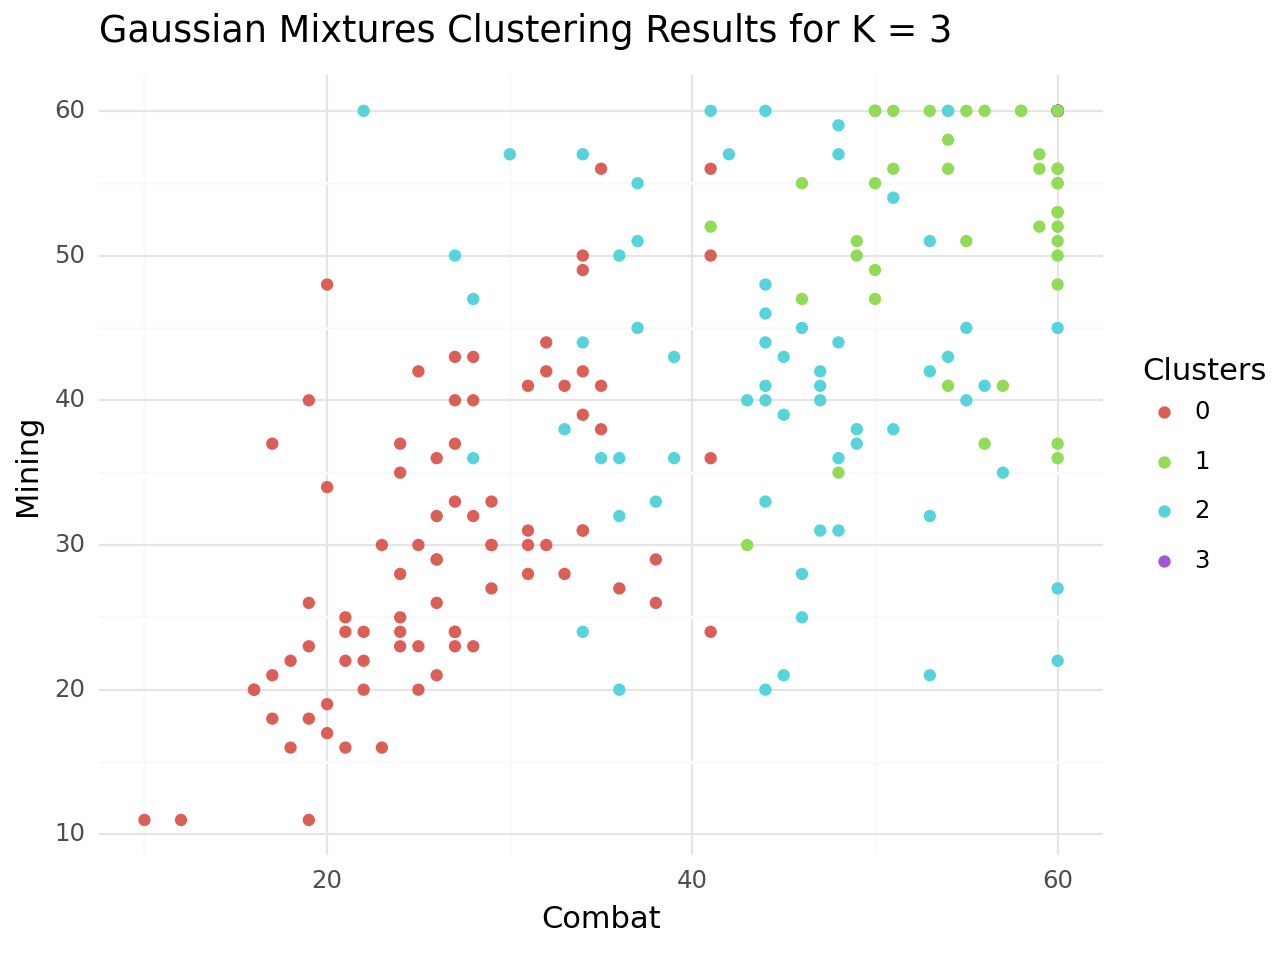

In [ ]:
# Filter data for non-Ironman gamemode
not_ironman_data = final_data[final_data["Gamemode"] == "Not Ironman"]

# Select predictors for X
X = not_ironman_data[predictors]

# Define column transformer for numeric features only
z = make_column_transformer(
    (StandardScaler(), predictors),  # Apply scaling to numeric features only
    remainder="passthrough")

# Define Gaussian Mixture Model pipeline
gmm = GaussianMixture(n_components=4)
gauss_pipe = Pipeline([("clust", gmm)])

# Fit and predict labels
labels = gauss_pipe.fit_predict(X)

# Add cluster labels to X
X["clusters"] = labels

# Calculate silhouette score
print(silhouette_score(X, labels))

print(ggplot(X, aes(x = "Enchanting", y = "Alchemy", color = "factor(clusters)" )) +
      geom_point() + theme_minimal() +
     labs(x = "Enchanting", y = "Alchemy", title = "Gaussian Mixtures Clustering Results for K = 4",
         color = "Clusters"))
print(ggplot(X, aes(x = "Farming", y = "Fishing", color = "factor(clusters)" )) +
      geom_point() + theme_minimal() +
     labs(x = "Farming", y = "Fishing", title = "Gaussian Mixtures Clustering Results for K = 4",
         color = "Clusters"))
print(ggplot(X, aes(x = "Combat", y = "Mining", color = "factor(clusters)" )) +
      geom_point() + theme_minimal() +
     labs(x = "Combat", y = "Mining", title = "Gaussian Mixtures Clustering Results for K = 4",
         color = "Clusters"))

0.6030869192021063


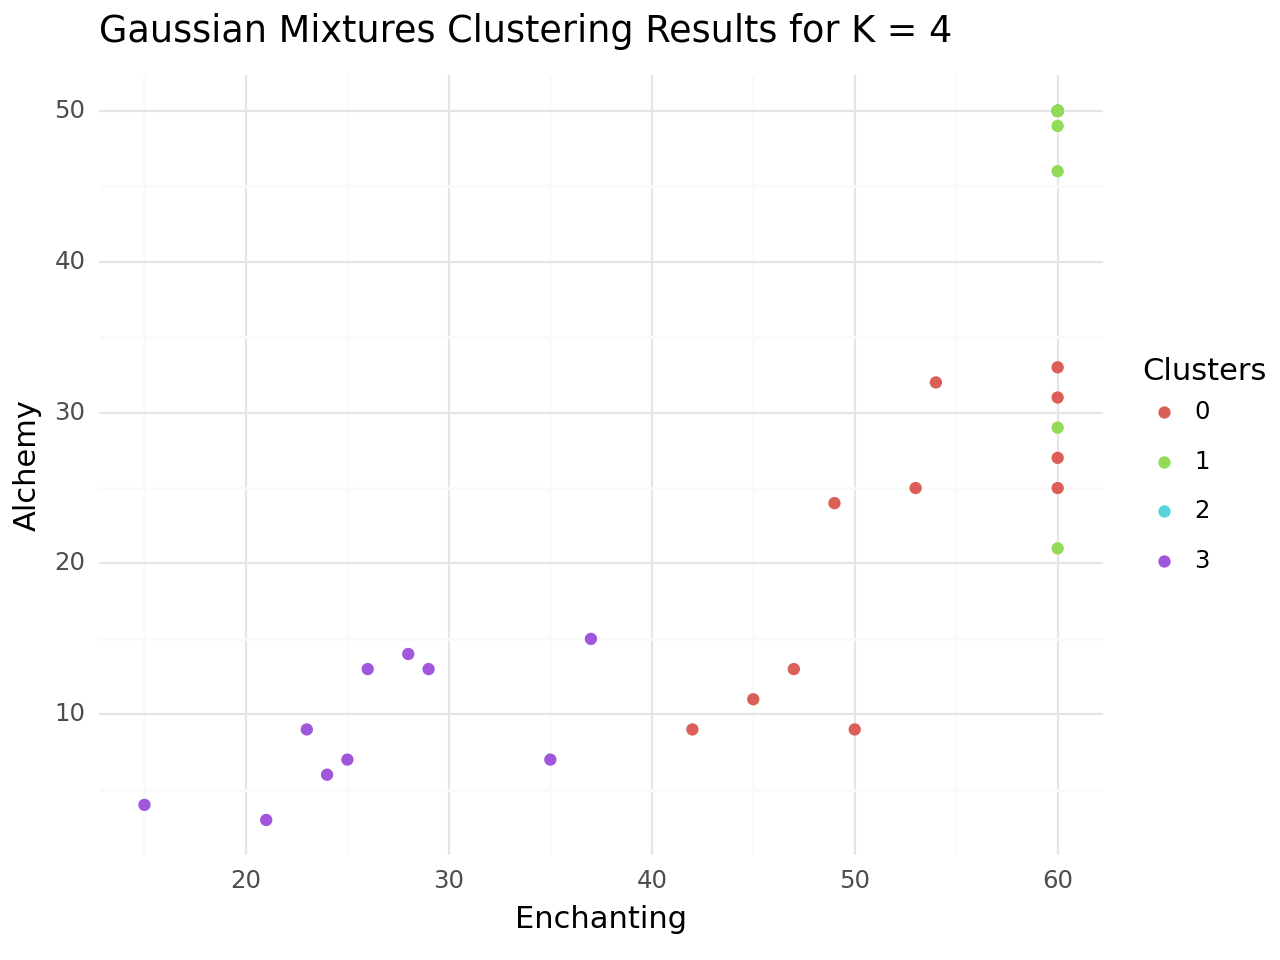

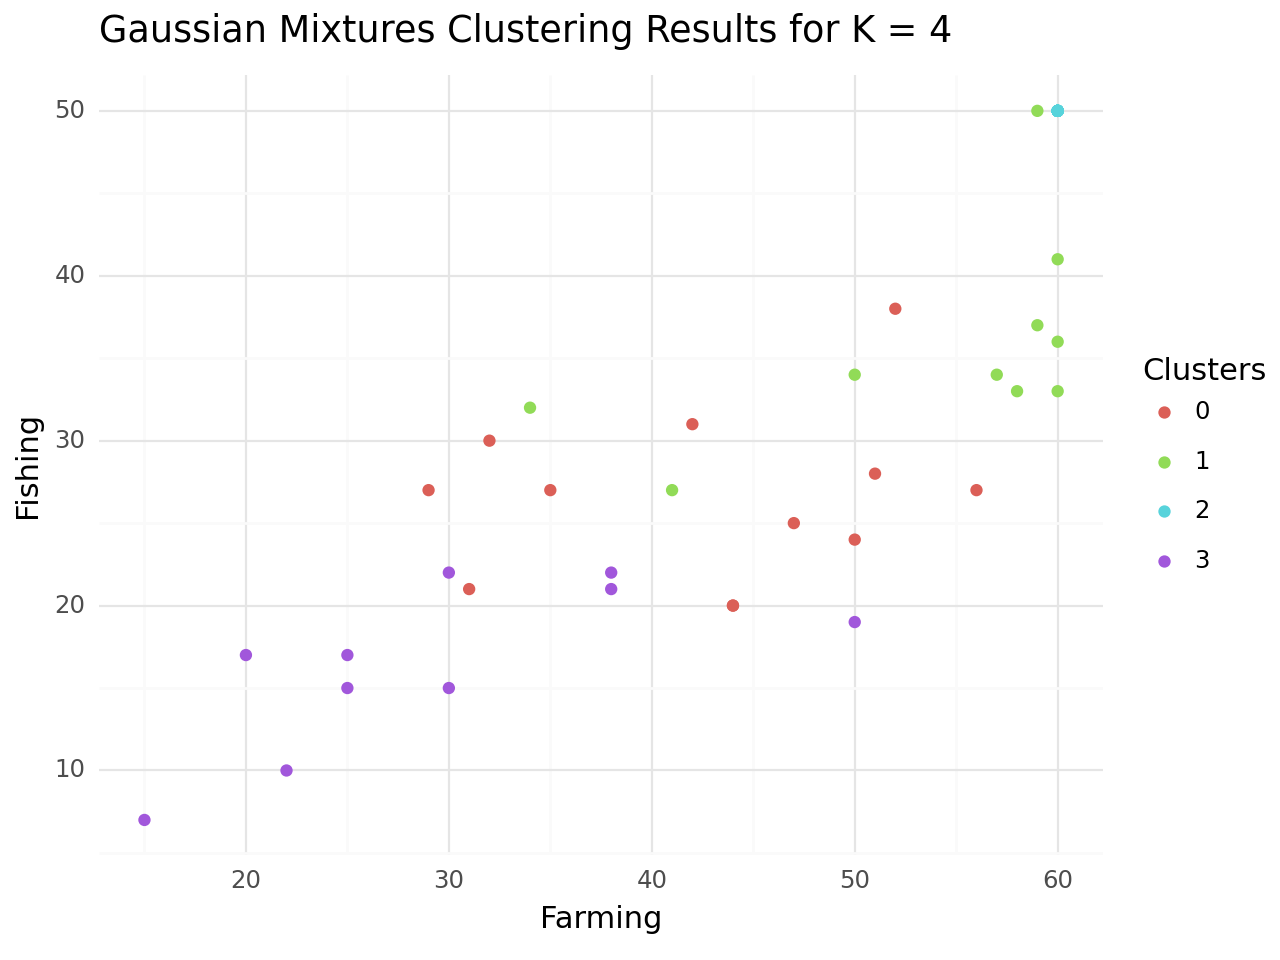

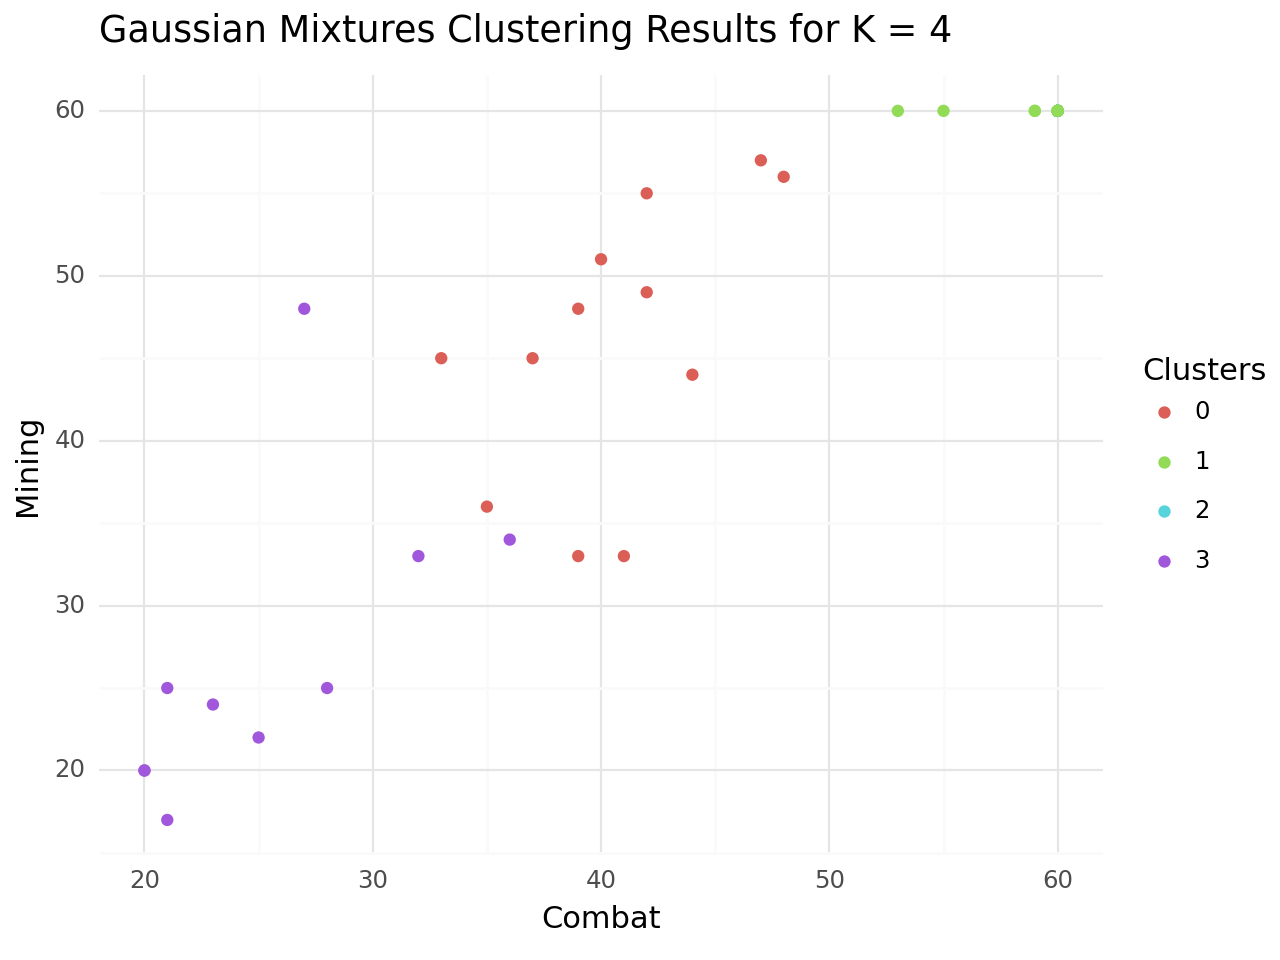

In [ ]:
# Filter data for Ironman gamemode
not_ironman_data = final_data[final_data["Gamemode"] == "Ironman"]

# Select predictors for X
X = not_ironman_data[predictors]

# Define column transformer for numeric features only
z = make_column_transformer(
    (StandardScaler(), predictors),  # Apply scaling to numeric features only
    remainder="passthrough")

# Define Gaussian Mixture Model pipeline
gmm = GaussianMixture(n_components=4)
gauss_pipe = Pipeline([("clust", gmm)])

# Fit and predict labels
labels = gauss_pipe.fit_predict(X)

# Add cluster labels to X
X["clusters"] = labels

# Calculate silhouette score
print(silhouette_score(X, labels))

print(ggplot(X, aes(x = "Enchanting", y = "Alchemy", color = "factor(clusters)" )) +
      geom_point() + theme_minimal() +
     labs(x = "Enchanting", y = "Alchemy", title = "Gaussian Mixtures Clustering Results for K = 4",
         color = "Clusters"))
print(ggplot(X, aes(x = "Farming", y = "Fishing", color = "factor(clusters)" )) +
      geom_point() + theme_minimal() +
     labs(x = "Farming", y = "Fishing", title = "Gaussian Mixtures Clustering Results for K = 4",
         color = "Clusters"))
print(ggplot(X, aes(x = "Combat", y = "Mining", color = "factor(clusters)" )) +
      geom_point() + theme_minimal() +
     labs(x = "Combat", y = "Mining", title = "Gaussian Mixtures Clustering Results for K = 4",
         color = "Clusters"))

##Answer: When considering player level and skills, only a weak cluster pattern emerges, despite somewhat decent silhouette scores. Potentially due to lower sample size, the clusters become much more apparent when only sorting by gamemode = ironman.

##Question 3: When comparing a PCA model including the cosmetic skills to a PCA model excluding cosmetic skills (both using all other continuous variables), is there a change in the number of PC’s needed to retain 95% of the variance? If so, why might this be? If not, why might this be?


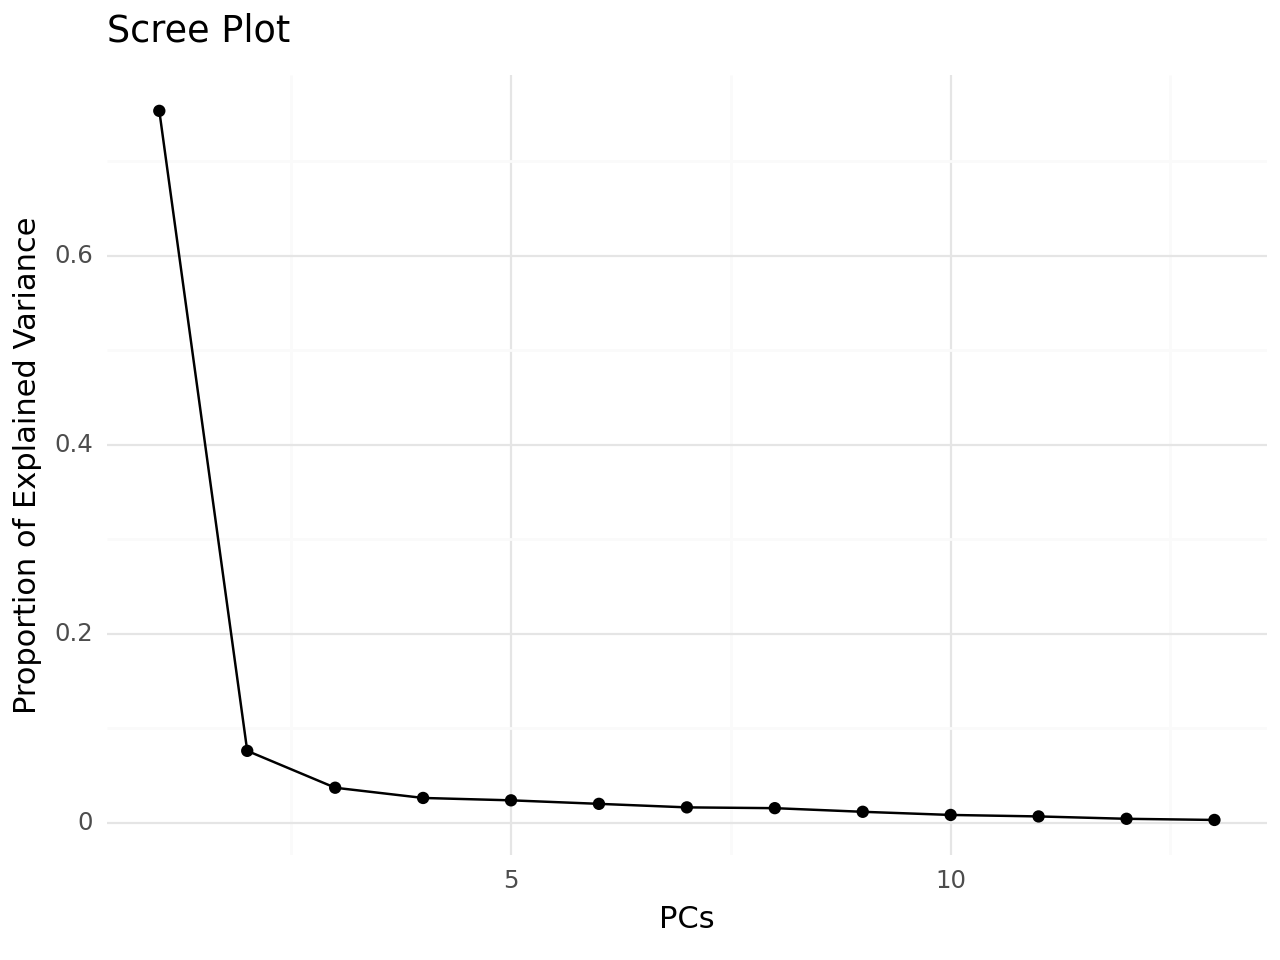

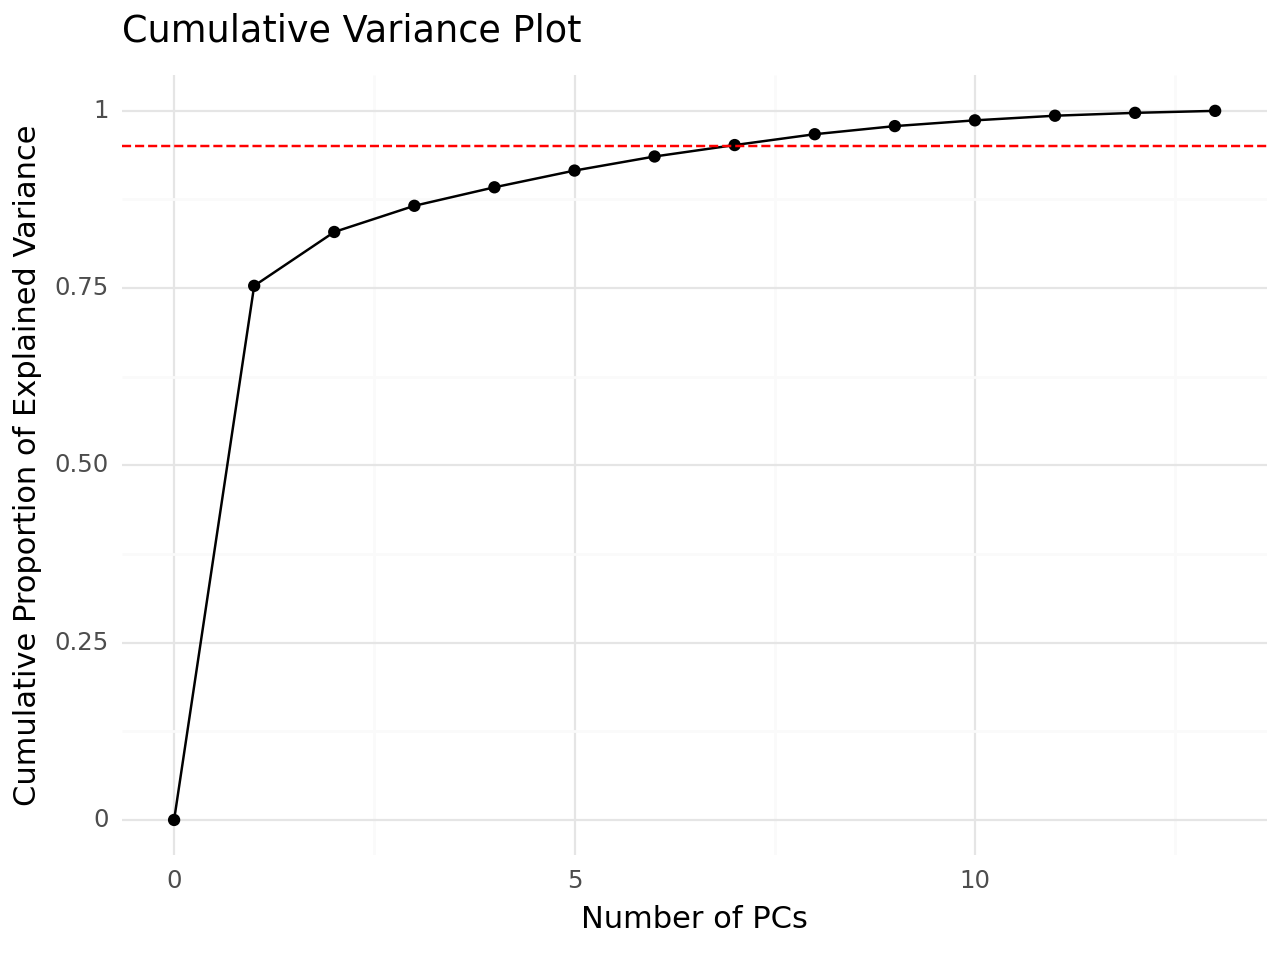

In [ ]:
predictors = ["Level", "Taming", "Farming", "Mining", "Combat", "Foraging", "Fishing",
              "Enchanting", "Alchemy", "Carpentry", "Runecrafting", "Social", "Net Worth"]
X = final_data[predictors]
# empty pipeline
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

pca = PCA()

pipe_b = Pipeline([
    ("z", z),
    ("pca", pca)
])

# fit
pipe_b.fit(X)

# scree/cumvar plot
pcaDF = pd.DataFrame({"expl_var" :
                      pipe_b.named_steps["pca"].explained_variance_ratio_,
                      "pc": range(1,14),
                      "cum_var":
                      pipe_b.named_steps["pca"].explained_variance_ratio_.cumsum()})

# scree
print(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point() +
 theme_minimal() + labs(x = "PCs", y = "Proportion of Explained Variance", title = "Scree Plot"))

# cumulative variance
pcaDF0 = pd.concat([pcaDF, pd.DataFrame({"pc": [0], "cum_var": [0]})]) # add 0,0 for reference

print(ggplot(pcaDF0, aes(x = "pc", y = "cum_var")) + geom_line() +
 geom_point() + geom_hline(yintercept = 0.95, color = "red", linetype = "dashed") +
 theme_minimal() + labs(x = "Number of PCs", y = "Cumulative Proportion of Explained Variance", title = "Cumulative Variance Plot"))

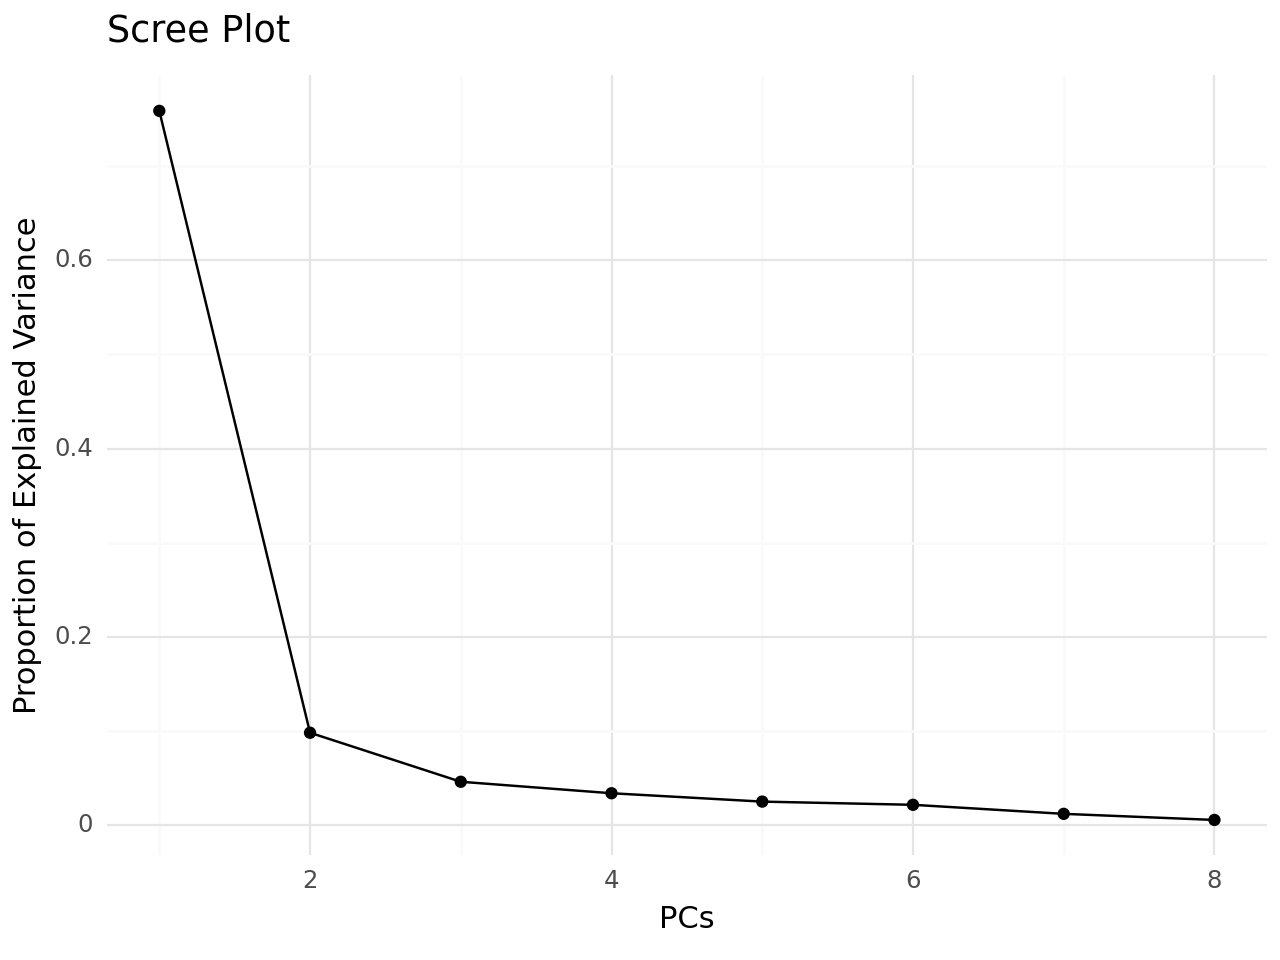

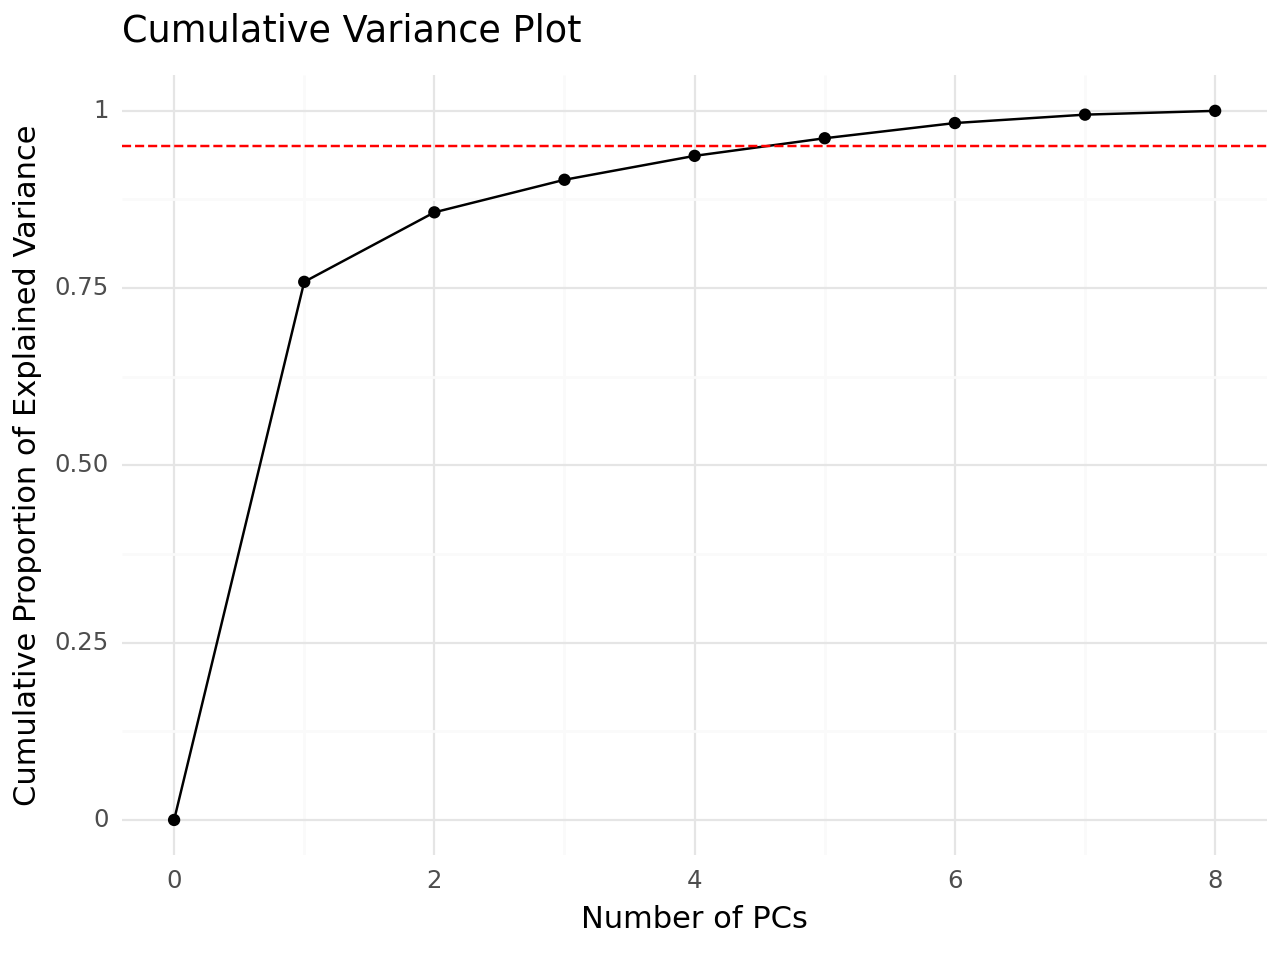

In [ ]:
predictors = ["Level", "Farming", "Mining", "Combat", "Foraging", "Fishing",
              "Enchanting", "Net Worth"]
X = final_data[predictors]
# empty pipeline
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

pca = PCA()

pipe_b = Pipeline([
    ("z", z),
    ("pca", pca)
])

# fit
pipe_b.fit(X)

# scree/cumvar plot
pcaDF = pd.DataFrame({"expl_var" :
                      pipe_b.named_steps["pca"].explained_variance_ratio_,
                      "pc": range(1,9),
                      "cum_var":
                      pipe_b.named_steps["pca"].explained_variance_ratio_.cumsum()})

# scree
print(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point() +
 theme_minimal() + labs(x = "PCs", y = "Proportion of Explained Variance", title = "Scree Plot"))

# cumulative variance
pcaDF0 = pd.concat([pcaDF, pd.DataFrame({"pc": [0], "cum_var": [0]})]) # add 0,0 for reference

print(ggplot(pcaDF0, aes(x = "pc", y = "cum_var")) + geom_line() +
 geom_point() + geom_hline(yintercept = 0.95, color = "red", linetype = "dashed") +
 theme_minimal() + labs(x = "Number of PCs", y = "Cumulative Proportion of Explained Variance", title = "Cumulative Variance Plot"))

0.48255259839954706


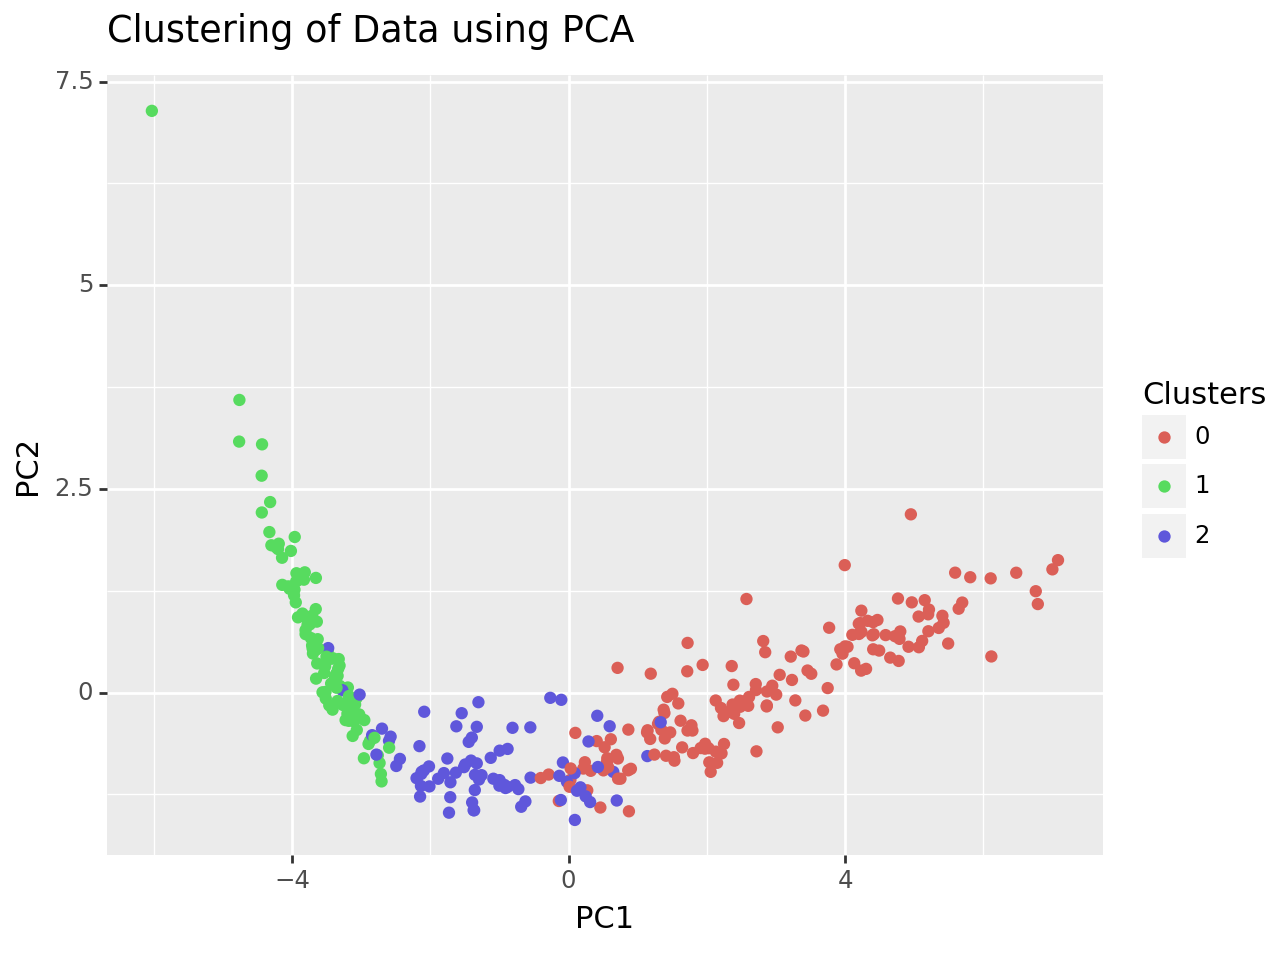

<Figure Size: (640 x 480)>

In [ ]:
predictors = ["Level", "Taming", "Farming", "Mining", "Combat", "Foraging", "Fishing",
              "Enchanting", "Alchemy", "Carpentry", "Runecrafting", "Social", "Net Worth"]
X = final_data[predictors]

z = make_column_transformer((StandardScaler(), predictors),
                            remainder="drop")
pca = PCA(n_components=6)

gmm = GaussianMixture(n_components=2)

pipe_pca = Pipeline([
    ("z", z),
    ("pca", pca),
    ("clust", gmm)
])

labels = pipe_pca.fit_predict(X)

X["clusters"] = labels

X_pca = pca.transform(z.fit_transform(X))

print(silhouette_score(X, labels))

# Add PCA components to DataFrame
final_data[["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"]] = pd.DataFrame(X_pca, columns=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"])

(ggplot(final_data, aes(x=X_pca[:, 0], y=X_pca[:, 1], color='factor(clusters)')) +
        geom_point() +
        labs(x= "PC1", y= "PC2", color='Clusters') +
        ggtitle('Clustering of Data using PCA'))

##Answer: There is a change. In the first model (including cosmetic skills), the number of PC's needed to retain 95% variance is 7 with 1 split over the border (so perhaps 7.5), and in the second (disincluding cosmetic skills) only 5 are needed. This could be because cosmetic skills aren't actually crucial to progression therefore it isn't as predictable when players will choose to level their cosmetic skills (adding some chaos/variability to the data)